### <center> My Workbook - Project Python M203 </center>

In [1]:
from project_python_203.Data_treatment import *
from pybacktestchain.data_module import *


In [2]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'INTC', 'CSCO', 'NFLX']
start_date = '2010-01-01'
end_date = '2020-01-01'
data = get_stocks_data(tickers, start_date, end_date)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2010-01-04 00:00:00-05:00,7.622500,7.660714,7.585000,7.643214,6.447412,493729600,AAPL
1,2010-01-05 00:00:00-05:00,7.664286,7.699643,7.616071,7.656429,6.458559,601904800,AAPL
2,2010-01-06 00:00:00-05:00,7.656429,7.686786,7.526786,7.534643,6.355828,552160000,AAPL
3,2010-01-07 00:00:00-05:00,7.562500,7.571429,7.466071,7.520714,6.344077,477131200,AAPL
4,2010-01-08 00:00:00-05:00,7.510714,7.571429,7.466429,7.570714,6.386254,447610800,AAPL


In [3]:
data_module = DataModule(data)

#Information : 
info = Information(s = timedelta(data_module.data.size/len(tickers)), data_module=data_module)
info

Information(s=datetime.timedelta(days=20019, seconds=48000), data_module=DataModule(data=                          Date        Open        High         Low  \
0    2010-01-04 00:00:00-05:00    7.622500    7.660714    7.585000   
1    2010-01-05 00:00:00-05:00    7.664286    7.699643    7.616071   
2    2010-01-06 00:00:00-05:00    7.656429    7.686786    7.526786   
3    2010-01-07 00:00:00-05:00    7.562500    7.571429    7.466071   
4    2010-01-08 00:00:00-05:00    7.510714    7.571429    7.466429   
...                        ...         ...         ...         ...   
2511 2019-12-24 00:00:00-05:00  334.010010  335.700012  331.600006   
2512 2019-12-26 00:00:00-05:00  334.600006  336.459991  332.010010   
2513 2019-12-27 00:00:00-05:00  332.959991  333.820007  326.010010   
2514 2019-12-30 00:00:00-05:00  329.079987  329.190002  322.859985   
2515 2019-12-31 00:00:00-05:00  322.000000  324.920013  321.089996   

           Close   Adj Close     Volume ticker  
0       7.643214    6

In [4]:
data_treatment = Data_treatment(data)

In [9]:
MVA = data_treatment.compute_moving_average(short_window=40, long_window=200)
MVA

,Date,Open,High,Low,Close,Adj Close,Volume,ticker,Short_MA,Long_MA
0,2010-01-04 00:00:00-05:00,7.622500,7.660714,7.585000,7.643214,6.447412,493729600,AAPL,6.447412,6.447412
1,2010-01-05 00:00:00-05:00,7.664286,7.699643,7.616071,7.656429,6.458559,601904800,AAPL,6.452985,6.452985
2,2010-01-06 00:00:00-05:00,7.656429,7.686786,7.526786,7.534643,6.355828,552160000,AAPL,6.420600,6.420600
3,2010-01-07 00:00:00-05:00,7.562500,7.571429,7.466071,7.520714,6.344077,477131200,AAPL,6.401469,6.401469
4,2010-01-08 00:00:00-05:00,7.510714,7.571429,7.466429,7.570714,6.386254,447610800,AAPL,6.398426,6.398426
...,...,...,...,...,...,...,...,...,...,...
2389,2019-12-24 00:00:00-05:00,27.890667,28.364668,27.512667,28.350000,28.350000,120820500,TSLA,23.248983,17.477367
2390,2019-12-26 00:00:00-05:00,28.527332,28.898666,28.423332,28.729334,28.729334,159508500,TSLA,23.440183,17.524693
2391,2019-12-27 00:00:00-05:00,29.000000,29.020666,28.407333,28.691999,28.691999,149185500,TSLA,23.632467,17.571500
2392,2019-12-30 00:00:00-05:00,28.586000,28.600000,27.284000,27.646667,27.646667,188796000,TSLA,23.798767,17.617923


In [10]:
MVA_AAPL = MVA[MVA['ticker'] == 'AAPL']
MVA_AAPL

,Date,Open,High,Low,Close,Adj Close,Volume,ticker,Short_MA,Long_MA
0,2010-01-04 00:00:00-05:00,7.622500,7.660714,7.585000,7.643214,6.447412,493729600,AAPL,6.447412,6.447412
1,2010-01-05 00:00:00-05:00,7.664286,7.699643,7.616071,7.656429,6.458559,601904800,AAPL,6.452985,6.452985
2,2010-01-06 00:00:00-05:00,7.656429,7.686786,7.526786,7.534643,6.355828,552160000,AAPL,6.420600,6.420600
3,2010-01-07 00:00:00-05:00,7.562500,7.571429,7.466071,7.520714,6.344077,477131200,AAPL,6.401469,6.401469
4,2010-01-08 00:00:00-05:00,7.510714,7.571429,7.466429,7.570714,6.386254,447610800,AAPL,6.398426,6.398426
...,...,...,...,...,...,...,...,...,...,...
2511,2019-12-24 00:00:00-05:00,71.172501,71.222504,70.730003,71.067497,68.898689,48478800,AAPL,64.365174,52.349395
2512,2019-12-26 00:00:00-05:00,71.205002,72.495003,71.175003,72.477501,70.265648,93121200,AAPL,64.652068,52.482847
2513,2019-12-27 00:00:00-05:00,72.779999,73.492500,72.029999,72.449997,70.239014,146266000,AAPL,64.938479,52.613743
2514,2019-12-30 00:00:00-05:00,72.364998,73.172501,71.305000,72.879997,70.655891,144114400,AAPL,65.202085,52.743859


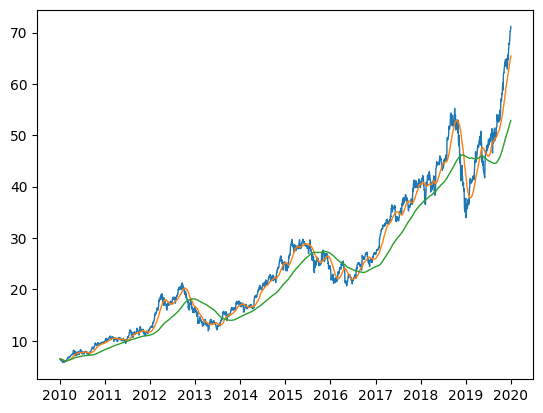

In [ ]:


plt.plot(MVA_AAPL['Date'], MVA_AAPL['Adj Close'], label='Adj Close', linewidth=1)
plt.plot(MVA_AAPL['Date'], MVA_AAPL['Short_MA'], label='Short-Term MA', linewidth=1)
plt.plot(MVA_AAPL['Date'], MVA_AAPL['Long_MA'], label='Long-Term MA', linewidth=1)

